<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/6_3_Machine_Learning_with_Tree_Based_Models_in_Python_Bagging_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6-3 Machine Learning with Tree-Based Models in Python - Bagging and Random Forests

## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, root_mean_squared_error
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

## Data

In [2]:
base_url = 'https://drive.google.com/uc?id='

### Wisconsin Breast-Cancer Dataset

In [3]:
id = '1oqwkLiOXsHomv_Nhm4JhEUf0GQE8h1rp'
breast = pd.read_csv(base_url + id)
breast = breast.drop(['id', 'Unnamed: 32'], axis=1)
breast['diagnosis'] = (breast['diagnosis'] == 'M').astype(int)
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Indian Liver Patient Dataset

In [4]:
id = '1ZIKZwQV88fV7RFUSkhrTbGWGBxYxp9Rh'
liver = pd.read_csv(base_url + id)
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Auto-mpg Dataset

In [5]:
id = '14qqT73DvmgD0dx9zkcs3pxRLMCwSANii'
auto = pd.read_csv(base_url + id)
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


## Bagging

- Bagging is an ensemble method
- Bagging is also known as Bootstrap aggregation

### Ensemble Methods

- Voting Classifier
  - *same training set*
  - *uses different algorithms*
- Bagging
  - *different subsets of the traing set*
  - *one algorithm*

### Bagging

- Stands for **Bootstrap Aggregation**
- Uses a technique known as the **bootstrap**
- Bagging has the effect of **reducing the variance of individual models in the ensemble**

### Bootstrap

<img src='https://drive.google.com/uc?export=view&id=1NmalHUHte1C4sTjGqwS3jkvMFvQV3j3E'>

- Consider the case where you have 3 balls, labeled A, B and C
- A bootstrop is a sample drawn from this **with replacement**
  - "With replacement" means any ball can be drawn many times

### Bagging: Training

<img src='https://drive.google.com/uc?export=view&id=1WEVfQd7sbg8H8FWaOavsweombnxBKQ7e'>

- In the training phase, bagging consists of drawing N different samples from the training set
- Each of these bootstrap samples is used to train N models that use the same algorithm

<img src='https://drive.google.com/uc?export=view&id=1zRsRkCrIjz7BUzNeBPMfi_UYmGh-HBjs'>

- At prediction time, each model makes a prediction on the entire dataset (or at least the entire test set you're evaluating)
    - These predictions are combined
        - For classiification **hard voting** is usually used
            - `BaggingClassifier` in scikit-laern
        - For regression, an **average** is usually used
            - `BaggingRegressor` in scikit-learn

#### Toy Example

In [6]:
# create a simple dataset

X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

X.shape, y.shape

((200, 2), (200,))

In [7]:
display(X[:5], y[:5])

array([[-0.87292898,  0.013042  ],
       [ 1.31293463,  2.77053357],
       [ 2.34042818,  2.42099601],
       [ 2.29454774, -0.40438019],
       [ 0.94410516,  0.4772409 ]])

array([1, 1, 1, 1, 1])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 2), (60, 2), (140,), (60,))

In [9]:
# Build a Bagging ensemble of 10 Decision Trees
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),     # same base model
    n_estimators=10,                        # 10 trees
    random_state=42
)

bagging

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [10]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [11]:
bagging_preds = bagging.predict(X_test)
bagging_preds

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [12]:
# could also have used this for the following loop
bagging.estimators_

[DecisionTreeClassifier(random_state=1952926171),
 DecisionTreeClassifier(random_state=1761383086),
 DecisionTreeClassifier(random_state=1449071958),
 DecisionTreeClassifier(random_state=1910541088),
 DecisionTreeClassifier(random_state=1341730541),
 DecisionTreeClassifier(random_state=1286572245),
 DecisionTreeClassifier(random_state=1005142668),
 DecisionTreeClassifier(random_state=502852014),
 DecisionTreeClassifier(random_state=186414760),
 DecisionTreeClassifier(random_state=1956263048)]

In [13]:
bagging[0]

DecisionTreeClassifier(random_state=1952926171)

In [14]:
predictions = []
for model_num in range(0, 10):
    predictions.append(bagging[model_num].predict(X_test))

predictions = np.array(predictions)

In [15]:
predictions

array([[0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 

In [16]:
majority_votes, counts = stats.mode(predictions, axis=0, keepdims=False)

In [17]:
majority_votes

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [18]:
counts

array([10,  6,  7,  5, 10, 10,  9, 10,  5, 10,  5, 10, 10, 10,  6, 10, 10,
       10, 10,  6, 10,  7, 10,  7, 10, 10,  7,  6,  6, 10, 10, 10,  9, 10,
        9,  6, 10,  9,  7,  6,  9, 10,  8, 10, 10, 10,  9, 10, 10, 10,  9,
        9,  7, 10, 10, 10,  8, 10,  6,  6])

In [19]:
# stats.mode breaks a tie the same what that BaggingClassifier does
majority_votes[counts == 5]

array([0, 0, 0])

In [20]:
# does my manual method produce the same outcome?
bagging_preds == majority_votes

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

#### Bagging Classifier (Breast-Cancer dataset)

In [21]:
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']
X.shape, y.shape

((569, 30), (569,))

In [22]:
SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=SEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [23]:
# instantiate a classification tree
dt = DecisionTreeClassifier(max_depth=4,
                            min_samples_leaf=0.16,
                            random_state=SEED)
dt

DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=1)

In [24]:
bc = BaggingClassifier(
    estimator=dt,
    n_estimators=300,
    n_jobs=-1
)

bc

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                   min_samples_leaf=0.16,
                                                   random_state=1),
                  n_estimators=300, n_jobs=-1)

In [25]:
# fit bc to the training set
bc.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                   min_samples_leaf=0.16,
                                                   random_state=1),
                  n_estimators=300, n_jobs=-1)

In [26]:
# predict test set labels
y_pred = bc.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [27]:
accuracy_score(y_test, y_pred)

0.935672514619883

### Define the bagging classifier

In [28]:
# preprocessing
liver = liver.dropna()
liver = liver.copy()
liver['Is_male'] = (liver['Gender'] == 'Male').astype(int)
liver['Dataset'] = (liver['Dataset'] == 1).astype(int)
X = liver.drop(['Gender', 'Dataset'], axis=1)
y = liver['Dataset']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((463, 10), (116, 10), (463,), (116,))

In [30]:
dt = DecisionTreeClassifier(random_state=1)
dt

DecisionTreeClassifier(random_state=1)

In [31]:
bc = BaggingClassifier(
    estimator=dt,
    n_estimators=50,
    random_state=1
)
bc

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=50, random_state=1)

In [32]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 0.72


## Out of Bag Evaluation

### Bagging

- Some instances may be sampled several times for one model
- Other instances may not be sampled at all

### Out of Bag (OOB) instances

- On average, for each model, 63% of the training instances are sampled
- The remaining 37% constitute the OOB instances
- Since OOB instances are not seen by a model during training, these can be used to estimate the performance of the ensemble without the need for cross-validation. This technique is known as **OOB-evaluation**

In [33]:
n_samples = 1_000_000
n_draws = n_samples

draws = np.random.choice(n_samples, size=n_draws, replace=True)

n_selected = len(np.unique(draws))

n_selected / n_samples # should be close to 0.632

0.632649

### OOB Evaluation

<img src='https://drive.google.com/uc?export=view&id=10PyO6wuXaoAqH64bcRvptDKiQg7jOdC1'>

- For each model, the bootstrap instances are shown in blue while the OOB-intances are shown in red
- Each of the N models is trained on its corresponding bootstrap samples and evaluated on the OOB instances
  - This leads to the attainment of N OOB scores, labeled $OOB_1$ to $OOB_N$
- The OOB-score of the bagging ensemble is evaluated as the avarge of these N OOB scores, as shown by the formula on top
  - More precisely, in classification taks, the OOB score is simply the accuracy
  - In regression with a `BaggingRegressor`, the OOB score is an $R^{2}$ score

#### Toy Example

In [34]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 2), (60, 2), (140,), (60,))

In [35]:
# Build a Bagging ensemble of 10 Decision Trees
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),     # same base model
    n_estimators=10,                        # 10 trees
    oob_score=True,
    random_state=42
)

bagging

BaggingClassifier(estimator=DecisionTreeClassifier(), oob_score=True,
                  random_state=42)

In [36]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), oob_score=True,
                  random_state=42)

In [37]:
bagging.oob_score_

0.75

In [38]:
oob_scores = []
for estimator, bootstrap_indices in zip(bagging.estimators_, bagging.estimators_samples_):
    all_indices = np.arange(len(X_train))
    oob_indices = np.setdiff1d(all_indices, bootstrap_indices)
    score = accuracy_score(y_train[oob_indices], estimator.predict(X_train[oob_indices]))
    oob_scores.append(score)

np.round(np.mean(oob_scores), 2).item(), bagging.oob_score_

(0.75, 0.75)

#### OOB Evaluation in sklearn (Breast-Cancer dataset)

In [39]:
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=SEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [40]:
dt = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=0.16,
    random_state=SEED)

dt

DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=1)

In [41]:
bc = BaggingClassifier(
    estimator=dt,
    n_estimators=300,
    oob_score=True,
    n_jobs=-1
)

bc

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                   min_samples_leaf=0.16,
                                                   random_state=1),
                  n_estimators=300, n_jobs=-1, oob_score=True)

In [42]:
bc.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                   min_samples_leaf=0.16,
                                                   random_state=1),
                  n_estimators=300, n_jobs=-1, oob_score=True)

In [43]:
y_pred = bc.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [44]:
# evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# extract OOB acurac from bc
oob_accuracy = bc.oob_score_

test_accuracy, oob_accuracy

(0.9239766081871345, 0.9221105527638191)

### Prepare the ground

In [45]:
# preprocessing
liver = liver.dropna()
liver = liver.copy()
liver['Is_male'] = (liver['Gender'] == 'Male').astype(int)
liver['Dataset'] = (liver['Dataset'] == 1).astype(int)
X = liver.drop(['Gender', 'Dataset'], axis=1)
y = liver['Dataset']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((463, 10), (116, 10), (463,), (116,))

In [46]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(
    estimator=dt,
    n_estimators=50,
    oob_score=True,
    random_state=1)

### OOB Score vs Test Set Score

In [47]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.724, OOB accuracy: 0.695


## Random Forests

### Bagging

- Base estimator: Decision Tree, Logistic Regression, Neural Net, ...
- Each estimator is trained on a distinct bootstrap sample of the training set
- Estimators use all features for training and prediction

### Further Diversity with Random Forests

- Base estimator: Decision Tree
- Each estimator is trained in a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- $d$ features are sampled at each node without replacement
  - $d \lt \text{total number of faatures}$
  - In `sklearn`, the default value of $d$ is the square-root of the number of features

<img src='https://drive.google.com/uc?export=view&id=1QLhqwYohRMCCQ4e4mrOr3kIxQy86XWcP'>

### Random Forests: Prediction

<img src='https://drive.google.com/uc?export=view&id=1Nbx22VYqyXKDBretx-QvOeatb55r-qNx'>

- Once trained, predictions can be made on new instances
- When a new instance is fed to the different base estimators, each of them outputs a prediction
    - the predictions are then collected by the random forest meta-classifier and a final prediction is made
        - for classification: hard voting
        - for regression: average of all the labels
- The `sklearn` has both a `RandomForestClassifier` and a `RandomForestRegressor`
- In general, Random Forests achieve a **lower variance** than individual trees

### `RandomForestRegressor` in sklearn (auto dataset)

In [48]:
preprocessor = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop='first'), ['origin']),
    remainder='passthrough',
    force_int_remainder_cols=False
)

In [49]:
auto

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0
...,...,...,...,...,...,...,...
387,18.0,250.0,88,3021,16.5,US,15.0
388,27.0,151.0,90,2950,17.3,US,10.0
389,29.5,98.0,68,2135,16.6,Asia,10.0
390,17.5,250.0,110,3520,16.4,US,15.0


In [50]:
X = auto.drop('mpg', axis=1)
y = auto['mpg']

index = X.index

X = preprocessor.fit_transform(X)
X = pd.DataFrame(X,
                 columns=preprocessor.get_feature_names_out(),
                 index = index)

X.head()

,onehotencoder__origin_Europe,onehotencoder__origin_US,remainder__displ,remainder__hp,remainder__weight,remainder__accel,remainder__size
0,0.0,1.0,250.0,88.0,3139.0,14.5,15.0
1,0.0,1.0,304.0,193.0,4732.0,18.5,20.0
2,0.0,0.0,91.0,60.0,1800.0,16.4,10.0
3,0.0,1.0,250.0,98.0,3525.0,19.0,15.0
4,1.0,0.0,97.0,78.0,2188.0,15.8,10.0


In [51]:
# set seed for reproducibility
SEED = 123

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=SEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 7), (118, 7), (274,), (118,))

In [52]:
rf = RandomForestRegressor(
    n_estimators=400,
    min_samples_leaf=0.12,
    random_state=SEED
)

rf

RandomForestRegressor(min_samples_leaf=0.12, n_estimators=400, random_state=123)

In [53]:
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=0.12, n_estimators=400, random_state=123)

In [54]:
y_pred = rf.predict(X_test)
y_pred

array([14.53884174, 19.74984585, 14.53884174, 14.53884174, 19.21027608,
       19.66638986, 14.53884174, 18.29589681, 15.45456293, 29.39962955,
       32.94547568, 27.06760312, 15.82414989, 25.73969588, 32.94547568,
       15.43328181, 27.33507862, 24.95808209, 14.53884174, 25.08595428,
       25.97960705, 32.78692453, 25.07824239, 27.6874    , 24.59704104,
       14.53884174, 22.50995315, 32.91126625, 25.65473943, 26.67875443,
       14.53884174, 32.94547568, 14.8979363 , 25.63231646, 31.49918444,
       19.62249168, 20.42136169, 27.26889501, 28.61629221, 25.56092043,
       28.47563082, 32.94547568, 32.94547568, 28.56322064, 26.85469234,
       14.53884174, 14.57954271, 25.63774875, 27.63689336, 14.53884174,
       19.77787813, 29.32141593, 18.85937275, 14.55067606, 25.57845935,
       32.94547568, 15.43328181, 32.75271509, 15.46482237, 22.573028  ,
       29.18185266, 25.98233344, 14.55067606, 19.57112932, 25.63447413,
       25.57304622, 24.53994059, 14.53884174, 14.53884174, 24.85

In [55]:
rmse_test = mean_squared_error(y_test, y_pred)**(1/2)
rmse_test, root_mean_squared_error(y_test, y_pred)

(4.014472372442239, 4.014472372442239)

In [56]:
dt_reg = DecisionTreeRegressor(min_samples_leaf=0.12, random_state=SEED)
dt_reg.fit(X_train, y_train)
root_mean_squared_error(y_test, dt_reg.predict(X_test))

4.491301684152827

- Clearly, `RandomForestRegressor` makes better predictions that `DecisionTreeRegressor`

### Feature Importance

- Tree-based methods: enable measure the importance of each feature in prediction
- In `sklearn`: how much the tree nodes use a particular feature (weighted average) to reduce impurity

In [57]:
rf.feature_importances_, dt_reg.feature_importances_

(array([0.        , 0.        , 0.37682831, 0.18583832, 0.26839776,
        0.        , 0.16893561]),
 array([0.        , 0.        , 0.00421077, 0.22566884, 0.01277372,
        0.        , 0.75734667]))

In [58]:
rf.feature_names_in_

array(['onehotencoder__origin_Europe', 'onehotencoder__origin_US',
       'remainder__displ', 'remainder__hp', 'remainder__weight',
       'remainder__accel', 'remainder__size'], dtype=object)

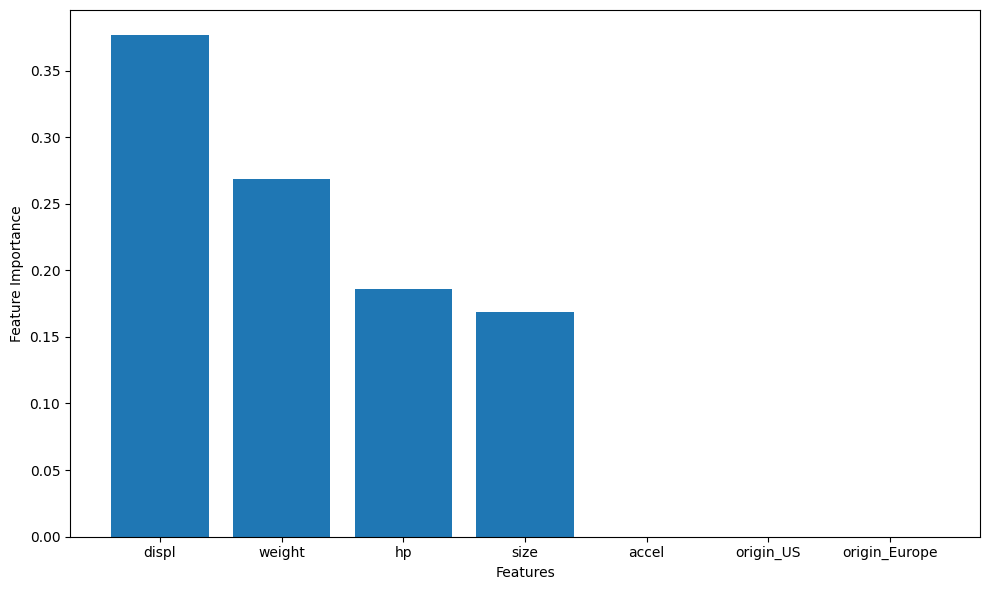

In [59]:
feature_names = np.array([s.split('__', 1)[1] for s in rf.feature_names_in_])
indices = np.argsort(rf.feature_importances_)[::-1]
sorted_features = feature_names[indices]
sorted_importances = rf.feature_importances_[indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)),
        sorted_importances,
        tick_label=sorted_features)
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [60]:
importances_rf = pd.Series(rf.feature_importances_, index=feature_names)
importances_rf

,0
origin_Europe,0.000000
origin_US,0.000000
displ,0.376828
hp,0.185838
weight,0.268398
accel,0.000000
size,0.168936


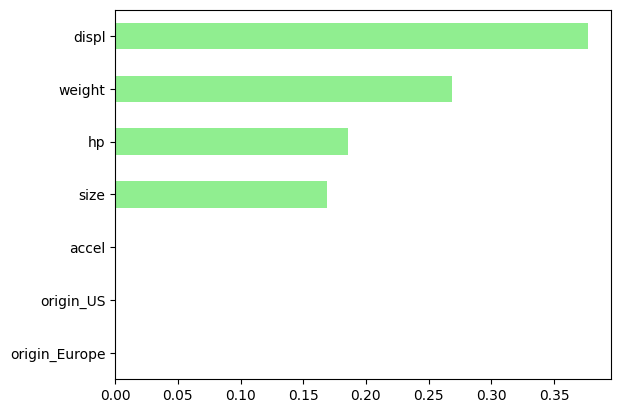

In [61]:
importances_rf.sort_values().plot(kind='barh', color='lightgreen')
plt.show()

### Train an RF regressor

```python
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)
```

### Evaluate an RF regressor

```python
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
```

### Visualizing feature importances

```python
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()
```